In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def R_arc(w, r, alpha):
    n = np.sqrt(w)*np.sqrt(2*r+w)
    return -alpha + ((r+w)/n*(np.arctan(np.tan(alpha)*(r+w)/n) + np.arctan(r*np.sin(alpha)/n) ))

def R_tri(w, r, alpha, beta, H):
    return np.tan(beta)*np.log((H/(w + r*(1-np.cos(alpha)) )))

def R_squ(w, Sy, r, alpha, beta, H):
    return (Sy-r*np.sin(alpha)+np.tan(beta)*(H-w-r*(1-np.cos(alpha))))/H

def R_tot(w, r, Sy, H, alpha, beta):
    return R_arc(w=w, r=r, alpha=alpha) + R_tri(w=w, r=r, alpha=alpha, beta=beta, H=H) + R_squ(w=w, Sy=Sy, r=r, alpha=alpha, beta=beta, H=H)


In this estimation, the line measuring 5.126 units is equivalent to 1000 nm
![empirical geometry](empirical-geometry.png)

In [3]:
r = 0.261*1000/5.126
alpha = np.pi*79.02/180
beta = np.pi*21.97/2/180
Sy = 2000
H = 1000

In [4]:
w = np.linspace(1, 250, 301)

In [5]:
R = R_tot(w=w, r=r, Sy=Sy, H=H, alpha=alpha, beta=beta)

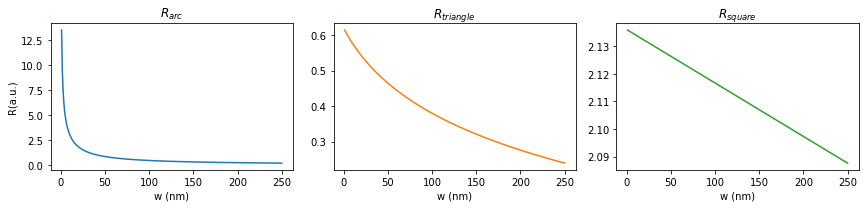

In [6]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.title(r'$R_{arc}$', size=12)
plt.plot(w, R_arc(w=w, r=r, alpha=alpha))
plt.ylabel('R(a.u.)')
plt.xlabel('w (nm)')

plt.subplot(1,3,2)
plt.title(r'$R_{triangle}$', size=12)
plt.plot(w, R_tri(w=w, r=r, alpha=alpha, beta=beta, H=H), color='C1')
plt.xlabel('w (nm)')

plt.subplot(1,3,3)
plt.title(r'$R_{square}$', size=12)
plt.plot(w, R_squ(w=w, r=r, alpha=alpha, beta=beta, H=H, Sy=Sy), color='C2')
plt.xlabel('w (nm)')

plt.tight_layout()
#plt.savefig('R-effects.png', facecolor='white')

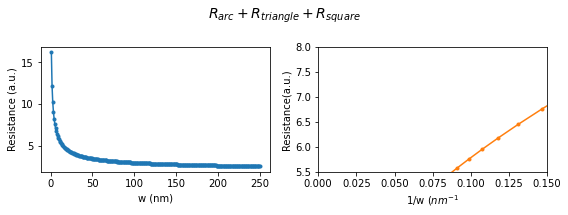

In [7]:
plt.figure(figsize=(8,3))
plt.suptitle(r'$R_{arc}+R_{triangle}+R_{square}$', size=14)
plt.subplot(1,2,1)
plt.plot(w, R, '.-')
plt.ylabel('Resistance (a.u.)')
plt.xlabel('w (nm)')
plt.subplot(1,2,2)
plt.plot(1/w, R, '.-', color='C1')
plt.xlabel('1/w ($nm^{-1}$')
plt.ylabel('Resistance(a.u.)')
plt.xlim(0,0.15)
plt.ylim(5.5,8)
plt.tight_layout()
#plt.savefig('R-geometrical.png', facecolor='white')

In [16]:
resistance_data = np.genfromtxt(fname='device_resistance_different_oxide_seed_layer.txt', dtype='str', skip_header=1)
SiO2_data = np.genfromtxt(fname='SiO2-with-more-points.txt', dtype='str', skip_header=1)

In [20]:
Hi_res_Si = np.array([k for k in resistance_data[:,:2] if k[1] != '--'], dtype=float)
Si_SiN = np.array([k for k in resistance_data[:,2:4] if k[1] != '--'], dtype=float)
Al2O3 = np.array([k for k in resistance_data[:,4:6] if k[1] != '--'], dtype=float)
SiO2 = np.array([k for k in SiO2_data if k[1] != '--'], dtype=float)
SiO2[:,0] = 1/SiO2[:,0]

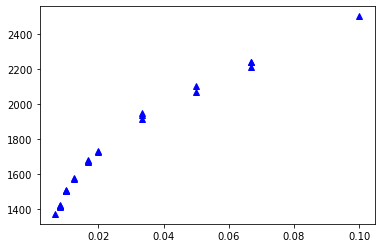

In [10]:
plt.plot(Si_SiN[:,0], Si_SiN[:,1], 'b^')

(1150.0, 2550.0)

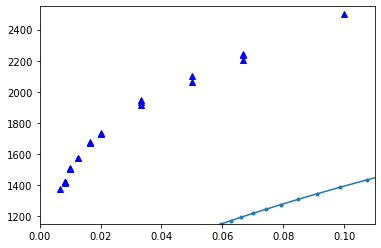

In [11]:
resistivity = 154e-6/6.4e-7
plt.plot(Si_SiN[:,0], Si_SiN[:,1], 'b^')
plt.plot(1/w, R*resistivity, '.-')
plt.xlim(0,0.11)
plt.ylim(1150, 2550)

In [12]:
def r_fit(w, rho, b):
    r = 0.261*1000/5.126
    alpha = np.pi*79.02/180
    beta = np.pi*21.97/2/180
    Sy = 1000
    H = 1000
    return rho*R_tot(w=w, r=r, Sy=Sy, H=H, alpha=alpha, beta=beta) + b
def r_parallel_fit(w, rho, b):
    r = 0.261*1000/5.126
    alpha = np.pi*79.02/180
    beta = np.pi*21.97/2/180
    Sy = 1000
    H = 1000
    return b*rho*R_tot(w=w, r=r, Sy=Sy, H=H, alpha=alpha, beta=beta)/(rho*R_tot(w=w, r=r, Sy=Sy, H=H, alpha=alpha, beta=beta) + b)

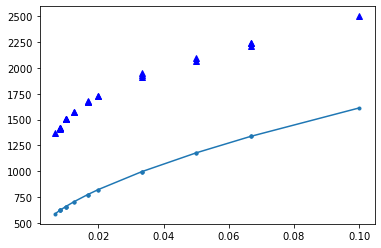

In [13]:
plt.plot(Si_SiN[:,0], Si_SiN[:,1], 'b^')
plt.plot(Si_SiN[:,0], 1.4*r_fit(1/Si_SiN[:,0], 154e-6/6.4e-7, 0), '.-')

In [14]:
def R_squared(f, xdata, ydata):
    popt, pcov = optimize.curve_fit(f, xdata, ydata)
    #You can get the residual sum of squares (ss_tot) with
    residuals = ydata- f(xdata, *popt)
    ss_res = np.sum(residuals**2)
    #You can get the total sum of squares (ss_tot) with
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    #And finally, the r_squared-value with,
    r_squared = 1 - (ss_res / ss_tot)
    return popt, pcov, r_squared


In [15]:
outlier_removal = np.zeros((4, 8))
fitted_data = np.zeros((len(w), 5))
fitted_data[:,0] = w

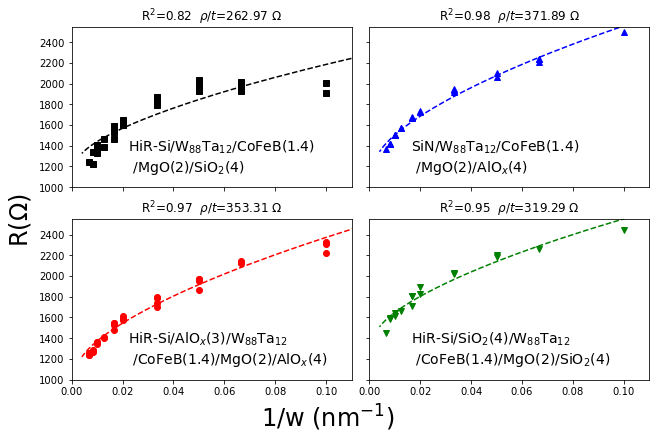

In [22]:
#plt.figure(figsize=(9,6))
fig, axs = plt.subplots(2, 2, figsize=(9, 6), constrained_layout=True,
                        sharex=True, sharey=True)
##################
plt.subplot(2,2,1)
##################
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Hi_res_Si[:,0], ydata = Hi_res_Si[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'k--', label='Geometric fit')
plt.plot(Hi_res_Si[:,0], Hi_res_Si[:,1], 'ks', label='Experiment')
outlier_removal[0, 0] = r_squared
outlier_removal[0, 1] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.annotate(text='HiR-Si/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/SiO$_{2}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))
fitted_data[:,1] = r_fit(w, *popt1)

#################
plt.subplot(2,2,2)
##################
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Si_SiN[:,0], ydata = Si_SiN[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'b--', label='Geometric fit')
plt.plot(Si_SiN[:,0], Si_SiN[:,1], 'b^', label='Experiment')
outlier_removal[0, 2] = r_squared
outlier_removal[0, 3] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)
plt.annotate(text='SiN/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/AlO$_{x}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))
fitted_data[:,2] = r_fit(w, *popt1)

##################
plt.subplot(2,2,3)
##################
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Al2O3[:,0], ydata = Al2O3[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'r--', label='Geometric fit')
plt.plot(Al2O3[:,0], Al2O3[:,1], 'ro', label='Experiment')
outlier_removal[0, 4] = r_squared
outlier_removal[0, 5] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/AlO$_x$(3)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/AlO$_{x}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))
fitted_data[:,3] = r_fit(w, *popt1)

##################
plt.subplot(2,2,4)
##################
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/SiO2[:,0], ydata = SiO2[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'g--', label='Geometric fit')
plt.plot(SiO2[:,0], SiO2[:,1], 'gv', label='Experiment')
outlier_removal[0, 6] = r_squared
outlier_removal[0, 7] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/SiO$_{2}$(4)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/SiO$_{2}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))
fitted_data[:,4] = r_fit(w, *popt1)

plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,         # ticks along the top edge are off
    labelleft=False)
fig.supylabel(r'R($\Omega$)', size=24)
fig.supxlabel(r'1/w (nm$^{-1}$)', size=24)
#plt.tight_layout()
plt.savefig('R-geometrical-fits.png', facecolor='white')

In [23]:
np.savetxt(fname='fitted_plots.txt', X=fitted_data, delimiter='\t', newline='\n', header='w(nm)\tHiR-Si\tSi-SiN\tAl2O3\tSiO2')

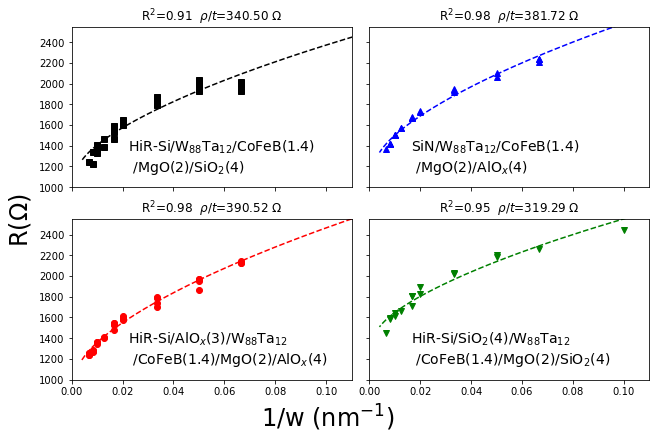

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6), constrained_layout=True,
                        sharex=True, sharey=True)

plt.subplot(2,2,1)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Hi_res_Si[2:,0], ydata = Hi_res_Si[2:,1])
plt.plot(1/w, r_fit(w, *popt1), 'k--', label='Geometric fit')
plt.plot(Hi_res_Si[2:,0], Hi_res_Si[2:,1], 'ks', label='Experiment')
outlier_removal[1, 0] = r_squared
outlier_removal[1, 1] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.annotate(text='HiR-Si/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/SiO$_{2}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,2)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Si_SiN[1:,0], ydata = Si_SiN[1:,1])
plt.plot(1/w, r_fit(w, *popt1), 'b--', label='Geometric fit')
plt.plot(Si_SiN[1:,0], Si_SiN[1:,1], 'b^', label='Experiment')
outlier_removal[1, 2] = r_squared
outlier_removal[1, 3] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)
plt.annotate(text='SiN/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/AlO$_{x}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,3)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Al2O3[3:,0], ydata = Al2O3[3:,1])
plt.plot(1/w, r_fit(w, *popt1), 'r--', label='Geometric fit')
plt.plot(Al2O3[3:,0], Al2O3[3:,1], 'ro', label='Experiment')
outlier_removal[1, 4] = r_squared
outlier_removal[1, 5] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/AlO$_x$(3)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/AlO$_{x}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,4)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/SiO2[:,0], ydata = SiO2[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'g--', label='Geometric fit')
plt.plot(SiO2[:,0], SiO2[:,1], 'gv', label='Experiment')
outlier_removal[1, 6] = r_squared
outlier_removal[1, 7] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/SiO$_{2}$(4)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/SiO$_{2}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))


plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,         # ticks along the top edge are off
    labelleft=False)
fig.supylabel(r'R($\Omega$)', size=24)
fig.supxlabel(r'1/w (nm$^{-1}$)', size=24)
plt.savefig('R-geometrical-fits-one-outlier.png', facecolor='white')

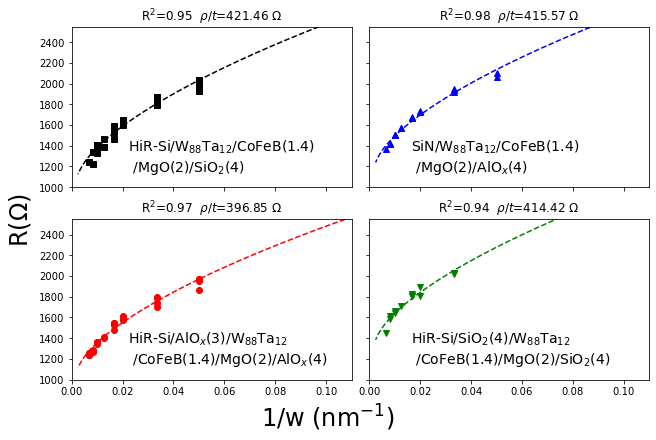

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6), constrained_layout=True,
                        sharex=True, sharey=True)

plt.subplot(2,2,1)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Hi_res_Si[5:,0], ydata = Hi_res_Si[5:,1])
plt.plot(1/w, r_fit(w, *popt1), 'k--', label='Geometric fit')
plt.plot(Hi_res_Si[5:,0], Hi_res_Si[5:,1], 'ks', label='Experiment')
outlier_removal[2, 0] = r_squared
outlier_removal[2, 1] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.annotate(text='HiR-Si/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/SiO$_{2}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,2)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Si_SiN[4:,0], ydata = Si_SiN[4:,1])
plt.plot(1/w, r_fit(w, *popt1), 'b--', label='Geometric fit')
plt.plot(Si_SiN[4:,0], Si_SiN[4:,1], 'b^', label='Experiment')
outlier_removal[2, 2] = r_squared
outlier_removal[2, 3] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)
plt.annotate(text='SiN/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/AlO$_{x}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,3)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Al2O3[6:,0], ydata = Al2O3[6:,1])
plt.plot(1/w, r_fit(w, *popt1), 'r--', label='Geometric fit')
plt.plot(Al2O3[6:,0], Al2O3[6:,1], 'ro', label='Experiment')
outlier_removal[2, 4] = r_squared
outlier_removal[2, 5] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/AlO$_x$(3)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/AlO$_{x}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,4)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/SiO2[:,0], ydata = SiO2[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'g--', label='Geometric fit')
plt.plot(SiO2[:,0], SiO2[:,1], 'gv', label='Experiment')
outlier_removal[2, 6] = r_squared
outlier_removal[2, 7] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/SiO$_{2}$(4)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/SiO$_{2}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))


plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,         # ticks along the top edge are off
    labelleft=False)
fig.supylabel(r'R($\Omega$)', size=24)
fig.supxlabel(r'1/w (nm$^{-1}$)', size=24)
plt.savefig('R-geometrical-fits-two-outliers.png', facecolor='white')

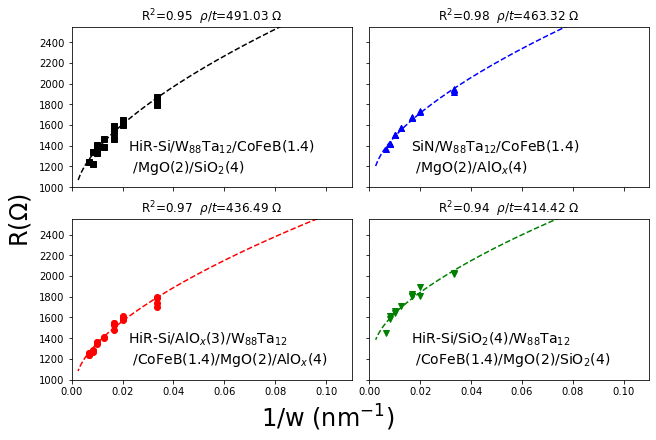

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6), constrained_layout=True,
                        sharex=True, sharey=True)

plt.subplot(2,2,1)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Hi_res_Si[8:,0], ydata = Hi_res_Si[8:,1])
plt.plot(1/w, r_fit(w, *popt1), 'k--', label='Geometric fit')
plt.plot(Hi_res_Si[8:,0], Hi_res_Si[8:,1], 'ks', label='Experiment')
outlier_removal[3, 0] = r_squared
outlier_removal[3, 1] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.annotate(text='HiR-Si/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/SiO$_{2}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,2)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Si_SiN[6:,0], ydata = Si_SiN[6:,1])
plt.plot(1/w, r_fit(w, *popt1), 'b--', label='Geometric fit')
plt.plot(Si_SiN[6:,0], Si_SiN[6:,1], 'b^', label='Experiment')
outlier_removal[3, 2] = r_squared
outlier_removal[3, 3] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)
plt.annotate(text='SiN/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/AlO$_{x}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,3)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Al2O3[10:,0], ydata = Al2O3[10:,1])
plt.plot(1/w, r_fit(w, *popt1), 'r--', label='Geometric fit')
plt.plot(Al2O3[10:,0], Al2O3[10:,1], 'ro', label='Experiment')
outlier_removal[3, 4] = r_squared
outlier_removal[3, 5] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/AlO$_x$(3)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/AlO$_{x}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,4)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/SiO2[:,0], ydata = SiO2[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'g--', label='Geometric fit')
plt.plot(SiO2[:,0], SiO2[:,1], 'gv', label='Experiment')
outlier_removal[3, 6] = r_squared
outlier_removal[3, 7] = popt1[0]

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/SiO$_{2}$(4)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/SiO$_{2}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))


plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,         # ticks along the top edge are off
    labelleft=False)
fig.supylabel(r'R($\Omega$)', size=24)
fig.supxlabel(r'1/w (nm$^{-1}$)', size=24)
plt.savefig('R-geometrical-fits-three-outliers.png', facecolor='white')

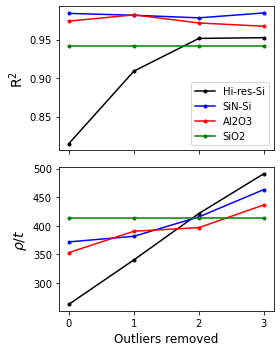

In [65]:
plt.figure(figsize=(4,5))
plt.subplot(2,1,1)
plt.plot(outlier_removal[:,0], 'k.-',label='Hi-res-Si')
plt.plot(outlier_removal[:,2], 'b.-', label='SiN-Si')
plt.plot(outlier_removal[:,4], 'r.-', label='Al2O3')
plt.plot(outlier_removal[:,6], 'g.-', label='SiO2')
plt.xticks([0,1,2,3])
plt.ylabel(r'R$^2$', size=14)
plt.legend()
plt.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.subplot(2,1,2)
plt.plot(outlier_removal[:,1], 'k.-',label='Hi-res-Si')
plt.plot(outlier_removal[:,3], 'b.-', label='SiN-Si')
plt.plot(outlier_removal[:,5], 'r.-', label='Al2O3')
plt.plot(outlier_removal[:,7], 'g.-', label='SiO2')
plt.xticks([0,1,2,3])
plt.ylabel(r'$\rho/t$', size=14)
plt.xlabel('Outliers removed', size=12)
plt.tight_layout()
plt.savefig('outlier-removal.png', facecolor='white')

Text(0.5, 0.01, '1/w (nm$^{-1}$)')

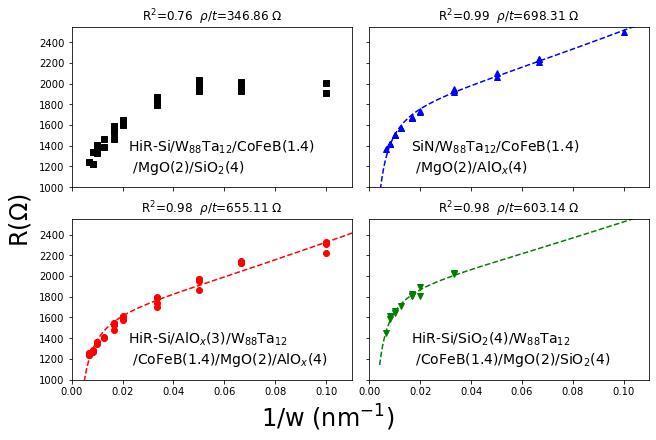

In [21]:
#plt.figure(figsize=(9,6))
fig, axs = plt.subplots(2, 2, figsize=(9, 6), constrained_layout=True,
                        sharex=True, sharey=True)

plt.subplot(2,2,1)
popt1, pcov1, r_squared = R_squared(f = r_parallel_fit, xdata = 1/Hi_res_Si[:,0], ydata = Hi_res_Si[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'k--', label='Geometric fit')
plt.plot(Hi_res_Si[:,0], Hi_res_Si[:,1], 'ks', label='Experiment')

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.annotate(text='HiR-Si/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/SiO$_{2}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,2)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Si_SiN[:,0], ydata = Si_SiN[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'b--', label='Geometric fit')
plt.plot(Si_SiN[:,0], Si_SiN[:,1], 'b^', label='Experiment')

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)
plt.annotate(text='SiN/W$_{88}$Ta$_{12}$/CoFeB(1.4) \n /MgO(2)/AlO$_{x}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,3)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Al2O3[:,0], ydata = Al2O3[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'r--', label='Geometric fit')
plt.plot(Al2O3[:,0], Al2O3[:,1], 'ro', label='Experiment')

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/AlO$_x$(3)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/AlO$_{x}(4)$', 
             xy=(0.2, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))

plt.subplot(2,2,4)
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/SiO2[:,0], ydata = SiO2[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'g--', label='Geometric fit')
plt.plot(SiO2[:,0], SiO2[:,1], 'gv', label='Experiment')

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)
plt.annotate(text='HiR-Si/SiO$_{2}$(4)/W$_{88}$Ta$_{12}$ \n /CoFeB(1.4)/MgO(2)/SiO$_{2}(4)$', 
             xy=(0.15, 0.1), xycoords='axes fraction', size=14)
plt.title(r'R$^2$={:.2f}  $\rho/t$={:.2f} $\Omega $'.format(r_squared, popt1[0]))


plt.tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,         # ticks along the top edge are off
    labelleft=False)
fig.supylabel(r'R($\Omega$)', size=24)
fig.supxlabel(r'1/w (nm$^{-1}$)', size=24)
#plt.tight_layout()
#plt.savefig('R-geometrical-fits.png', facecolor='white')

(1000.0, 2550.0)

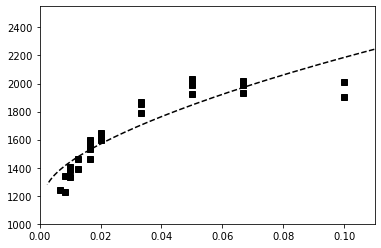

In [72]:
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = 1/Hi_res_Si[:,0], ydata = Hi_res_Si[:,1])
plt.plot(1/w, r_fit(w, *popt1), 'k--', label='Geometric fit')
plt.plot(Hi_res_Si[:,0], Hi_res_Si[:,1], 'ks', label='Experiment')

plt.xlim(0, 0.11)
plt.ylim(1000, 2550)

In [52]:
def inverse_law(w, a, b):
    return a/w + b

In [54]:
previous_widths = np.array((50, 80, 100, 120, 140, 150, 200, 250, 300))
previous_resistances = np.array((260, 190, 165, 155, 145,145, 130, 120, 110))
w = np.linspace(5, 400, 1000)

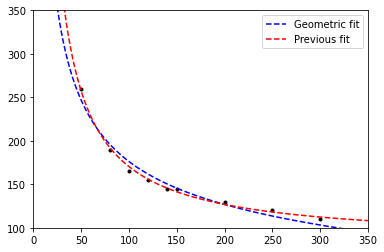

In [61]:
plt.plot(previous_widths, previous_resistances, 'k.')
popt1, pcov1, r_squared = R_squared(f = r_fit, xdata = previous_widths, ydata = previous_resistances)
plt.plot(w, r_fit(w, *popt1), 'b--', label='Geometric fit')
popt2, pcov2  = optimize.curve_fit(f = inverse_law, xdata = previous_widths, ydata = previous_resistances)
plt.plot(w, inverse_law(w, *popt2), 'r--', label='Previous fit')
plt.xlim(0, 350)
plt.ylim(100, 350)
plt.legend()